# Psedo code and mathematical analysis with proof
## Pseudo Code for minimizing the average distance

// Given X an array of points

    for i <- 0 to n-1 do
        for j <- 0 to n-1 do
            distances[j] = sqrt((X[i][0]-X[j][0])^2 +(X[i][1]-X[j][1])^2)
        
        sum = 0
        count = 0

        for k <- 0 to n-1 do
            sum += distances[k]
            count += 1

        average_distance[i] <- sum/count

    minimum_distance = inf
    for l <- 0 to n-1 do
        if average_distance[l] < minimum_distance do
            minimum_distance = average_distance[l]
            index_of_best_point = l

    return X[index_of_best_point]

### Mathematical Analysis
$\sum_{i=0}^{n}[ \sum_{j=0}^{n}(1) + \sum_{k=0}^{n}(1) ] + \sum_{l=0}^{n}(1)$

$= \sum_{i=0}^{n}[ n+1 + n+1 ] + n+1$

$= 2 * \sum_{i=0}^{n}(n+1) + n +1$

$= 2\sum_{i=0}^{n}(n) + 2*\sum_{i=0}^{n}(1) + n + 1$

$= 2*\frac{1}{2} n^{2} + 2*(n + 1) + n + 1$

$= n^{2} + 3n + 3$ 

$\epsilon$  $\theta(n^{2})$

## Pseudo Code for minimizing the maximum distance

// Given X an array of points
    
    for i <- 0 to n-1 do
        maximum_distance = 0
        for j <- 0 to n-1 do
            distance = sqrt((X[i][0]-X[j][0])^2 +(X[i][1]-X[j][1])^2)
            if distance > maximum_distance do
                maximum_distance = distance
                
        maximum_distances[i] = maximum_distance
    
    minimum_maxdistance = inf
    for k <- 0 to n-1 do
        if maximum_distances[k] < minimum_maxdistance do
            minimum_maxdistance = maximum_distances[k]
            index_of_best_point = k
            
    return X[index_of_best_point] 

### Mathematical Analysis
$\sum_{i=0}^{n}(\sum_{j=0}^{n}(1)) + \sum_{k=0}^{n}(1)$

$= \sum_{i=0}^{n}(n+1) + n+1$

$= \sum_{i=0}^{n}(n+1) + n +1$

$= \sum_{i=0}^{n}(n) + \sum_{i=0}^{n}(1) + n + 1$

$= \frac{1}{2} n^{2} + 2n + 2$

$\epsilon$  $\theta(n^{2})$

# Implementation Using Python
## Basic Implementation using python (minimizing average distance)
We will be using sklearn's make_blobs function to create a dataset of 100 points

In [1]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (14,7)
def scatterer(data, post, hue = "blue"):
    f, axes = plt.subplots(1, 1)
    plt.scatter(data[:,0],data[:,1], c= hue)
    plt.scatter(post[0],post[1],c="red")
    return f

def calc_distance(pt1, pt2):
    return ((pt1[0]-pt2[0])**2 +(pt1[1]-pt2[1])**2)**0.5

def brute_force_average(X):
    average_distances = []
    for i in X:
        distances = []
        for j in X:
            distances.append(calc_distance(i, j))
        sum_distances = 0
        count = 0
        for k in distances:
            sum_distances += k
            count +=1
        average_distance = sum_distances/count
        average_distances.append(average_distance)
    iterable = 0
    min_distance = np.inf
    for i in average_distances:
        if i< min_distance:
            min_distance = i
            index = iterable
        iterable += 1
    post_location = X[index,:]
    figure = scatterer(X, post_location)
    return post_location, figure

(array([-4.01119484, -6.52457643]), <Figure size 1008x504 with 1 Axes>)

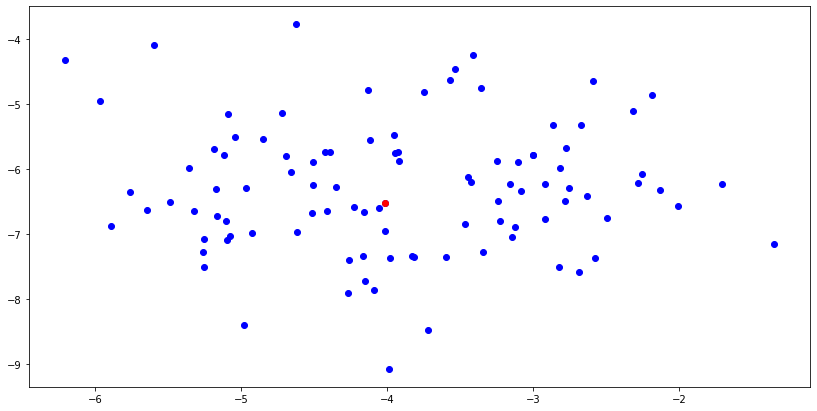

In [2]:
X,y = make_blobs(centers=1, n_samples=100, random_state=60)
brute_force_average(X)

## Basic Implementation using python (minimizing maximum distance)

In [3]:
def brute_force_maximum(X):
    max_distances = []
    for i in X:
        max_distance = 0
        for j in X:
            distance = calc_distance(i, j)
            if distance > max_distance:
                max_distance = distance
        max_distances.append(max_distance)
    iterable = 0
    min_distance = np.inf
    for i in max_distances:
        if i< min_distance:
            min_distance = i
            index = iterable
        iterable += 1
    post_location = X[index,:]
    figure = scatterer(X, post_location)
    return post_location, figure

(array([-4.2265805 , -6.58722102]), <Figure size 1008x504 with 1 Axes>)

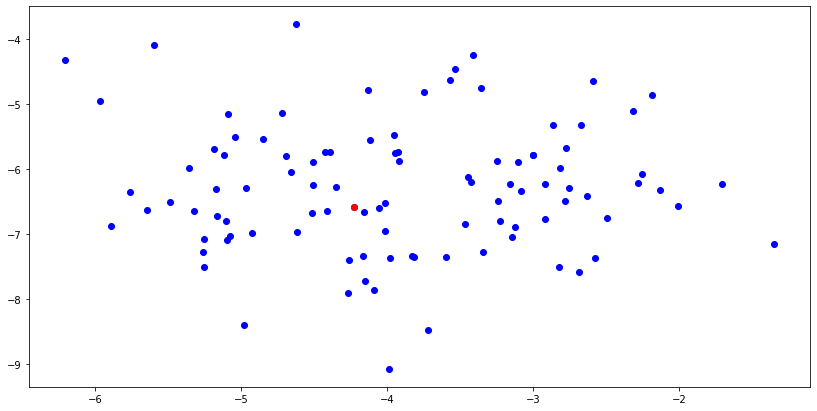

In [4]:
brute_force_maximum(X)

## Efficient designs using tricks
We will utilize numpy's vectorized operations. Instead of iterating through the array of points to calculate the distance to each point separately, numpy will help us calculate the distance from every point to one point in parallel.
We will also use numpy's sum and max functions which are more efficient

In [5]:
def efficient_distance_calculator(data, point):
    step_1 = (data - point)**2
    step_2 = np.sqrt(step_1.sum(axis=1))
    return step_2



def efficient_average(X):
    minimum = np.inf
    for i in X:
        distances = efficient_distance_calculator(X, i)
        average_distance = sum(distances)/len(distances)
        if average_distance<minimum:
            minimum = average_distance
            post_location = i
    return post_location

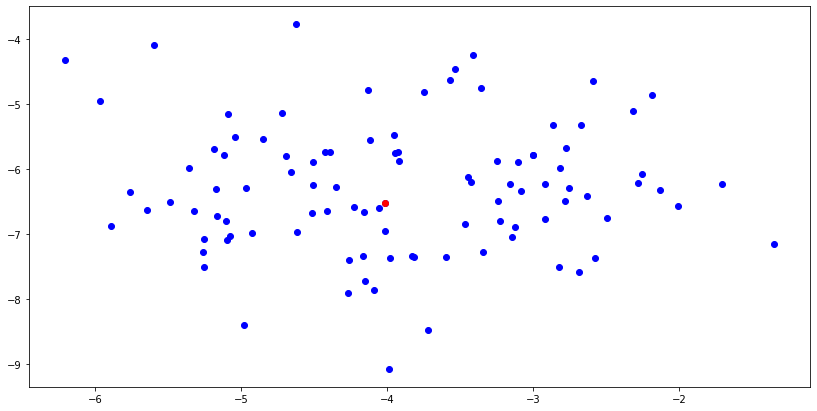

In [6]:
post_location = efficient_average(X)
figure = scatterer(X, post_location)

In [7]:
def efficient_maximum(X):
    minimum = np.inf
    for i in X:
        distances = efficient_distance_calculator(X, i)
        maximum_distance = np.max(distances)
        if maximum_distance<minimum:
            minimum = maximum_distance
            post_location = i
    return post_location

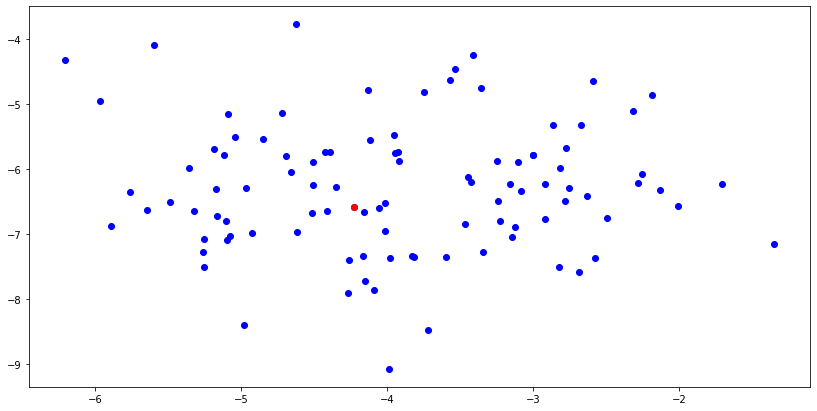

In [8]:
post_location = efficient_maximum(X)
figure = scatterer(X, post_location)

# Empirical analysis
We will generate datasets of size 10 points to 1000 points with a step size of 20 points. We will run each algorithm on each dataset 10 times and take the average running time and then we will plot the order of growth function.

In [9]:
X = []
for i in range(1,101):
    X_,y = make_blobs(centers=1, n_samples=10*i, random_state=60)
    X.append(X_)

In [10]:
import timeit, functools

times_for_avg = []
for i in X:
    t = timeit.Timer(functools.partial(efficient_average, i))
    elapsed_time = t.timeit(10)/10
    times_for_avg.append(elapsed_time)

In [11]:
times_for_max = []
for i in X:
    t = timeit.Timer(functools.partial(efficient_maximum, i))
    elapsed_time = t.timeit(10)/10
    times_for_max.append(elapsed_time)

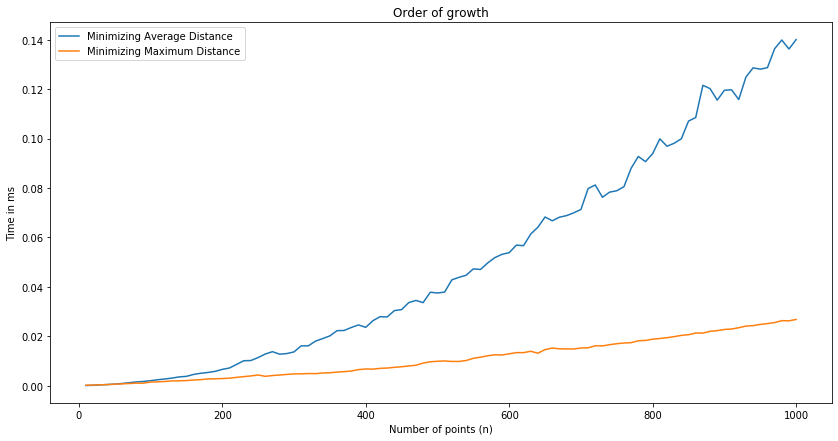

In [13]:
x = list(range(10,1001,10))
plt.plot(x,times_for_avg, label="Minimizing Average Distance")
plt.plot(x,times_for_max, label="Minimizing Maximum Distance")
plt.xlabel('Number of points (n)')
plt.ylabel('Time in ms')
plt.title('Order of growth')
plt.legend(loc="upper left")

# Discussion
Minimizing the average distance would make more sense in this application compared to minimizing the maximum distance because the location of the post office will be less affected by any outlier. In the maximum distance case, a single village that is sufficiently away from the cluster of the rest of the villages will move the post office a big distance from the cluster's center.

However, minimizing the maximum distance is faster to execute as we have seen in the empirical analysis. This is because there's less computational overhead since we do not have to calculate the average distance for each point to every other point. We calculate the distance point by point and only keep the maximum distance in memory. Which is more efficient.